In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
base_dir = "../datasets/"
orders_df = pd.read_csv(base_dir + "orders.csv")

# Convert timestamp to date time
orders_df["created_at"] = pd.to_datetime(orders_df["created_at"])

# Create date related features
orders_df["day_of_week"] = orders_df["created_at"].dt.dayofweek
orders_df["month"] = orders_df["created_at"].dt.month
orders_df["time_of_day"] = orders_df["created_at"].dt.hour + orders_df["created_at"].dt.minute / 60

In [3]:
orders_df.columns

Index(['order_id', 'store_id', 'to_user_distance', 'to_user_elevation',
       'total_earning', 'created_at', 'taken', 'day_of_week', 'month',
       'time_of_day'],
      dtype='object')

In [7]:
orders_df.head()

order_id   store_id  to_user_distance  to_user_elevation  total_earning  \
0  14364873   30000009          2.478101         -72.719360           4200   
1  14370123   30000058          0.451711          37.754761           4200   
2  14368534  900003684          2.026072         207.191162           4000   
3  14370258  900014452          2.671432           1.722656           4400   
4  14369923  900014085          0.965496         117.429199           3450   

                 created_at  taken  day_of_week  month  time_of_day  
0 2017-09-07 20:02:17+00:00      0            3      9    20.033333  
1 2017-09-07 20:13:16+00:00      0            3      9    20.216667  
2 2017-09-07 20:07:23+00:00      0            3      9    20.116667  
3 2017-09-07 20:15:19+00:00      1            3      9    20.250000  
4 2017-09-07 20:12:14+00:00      1            3      9    20.200000

In [8]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146987 entries, 0 to 146986
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   order_id           146987 non-null  int64              
 1   store_id           146987 non-null  int64              
 2   to_user_distance   146987 non-null  float64            
 3   to_user_elevation  146987 non-null  float64            
 4   total_earning      146987 non-null  int64              
 5   created_at         146987 non-null  datetime64[ns, UTC]
 6   taken              146987 non-null  int64              
 7   day_of_week        146987 non-null  int64              
 8   month              146987 non-null  int64              
 9   time_of_day        146987 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(6)
memory usage: 11.2 MB


In [9]:
orders_df.describe()

order_id      store_id  to_user_distance  to_user_elevation  \
count  1.469870e+05  1.469870e+05     146987.000000      146987.000000   
mean   1.507718e+07  7.580708e+08          1.501015          26.899130   
std    4.750119e+05  3.214280e+08          0.845776          84.907724   
min    1.421073e+07  3.000000e+07          0.000000        -598.296875   
25%    1.466969e+07  9.000045e+08          0.836511         -18.348755   
50%    1.509241e+07  9.000077e+08          1.390230          11.145264   
75%    1.547355e+07  9.000127e+08          2.029955          61.024353   
max    1.590252e+07  9.000173e+08          9.360177        1009.380005   

       total_earning          taken    day_of_week          month  \
count  146987.000000  146987.000000  146987.000000  146987.000000   
mean     5358.641594       0.921218       3.368624       9.124317   
std      1779.800955       0.269400       2.031396       0.329944   
min         0.000000       0.000000       0.000000       9.000000   
25%      4200.000000       1.000000       2.000000       9.000000   
50%      5200.000000       1.000000       4.000000       9.000000   
75%      6300.000000       1.000000       5.000000       9.000000   
max    108200.000000       1.000000       6.000000      10.000000   

         time_of_day  
count  146987.000000  
mean       16.251248  
std         3.797829  
min         0.000000  
25%        13.200000  
50%        16.400000  
75%        19.466667  
max        23.983333

There are 150K elements in the dataframe. The total earnings columns has some strange max and min values. The max user elevation is also pretty high, but not extremely strange. We will plot boxplots later..

The dataset is inbalanced, 92% of the samples are positive

In [10]:
# Check for null values in dataframe
orders_df.isnull().sum(axis=0)

order_id             0
store_id             0
to_user_distance     0
to_user_elevation    0
total_earning        0
created_at           0
taken                0
day_of_week          0
month                0
time_of_day          0
dtype: int64

There are no null values in the dataset

Lets look for outliers:

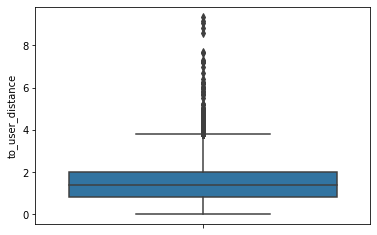

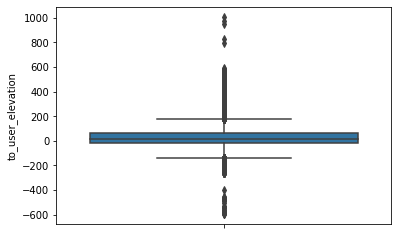

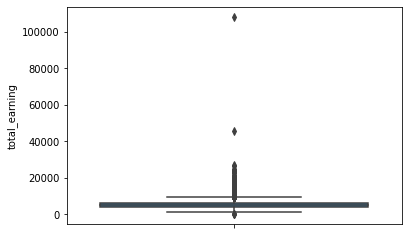

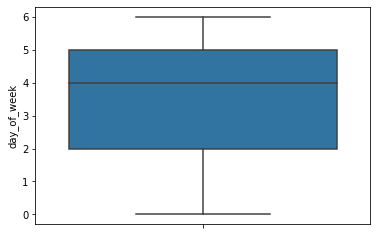

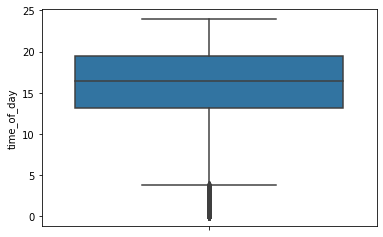

In [11]:
boxplot_columns = ["to_user_distance", "to_user_elevation", "total_earning", "day_of_week", "time_of_day"]
for i, column in enumerate(boxplot_columns):
    plt.figure(1)
    sns.boxplot(data=orders_df, y=orders_df[column], hue="taken")
    plt.show()

There are some strange high values in the total earnings distribution. 

We are going to eliminate the samples with earning above 4000, earning equal to , and elevations greater than 600, and distance greater than 8 km

In [12]:
filter_elevation = (orders_df["to_user_elevation"] < 600) 
filter_earnings = (orders_df["total_earning"] < 40000) & (orders_df["total_earning"] > 0)
filter_distance = orders_df["to_user_distance"] < 8

orders_filt_df = orders_df[filter_elevation & filter_earnings & filter_distance]

In [13]:
# Compute amount eliminated
len(orders_df) - len(orders_filt_df)

13

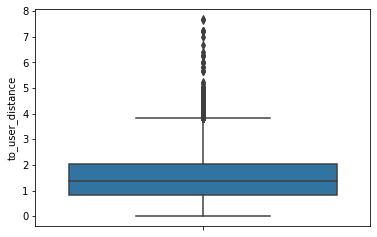

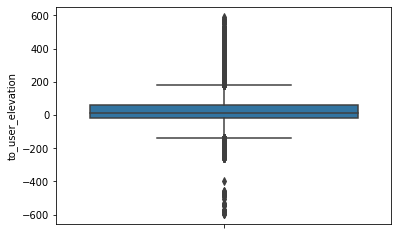

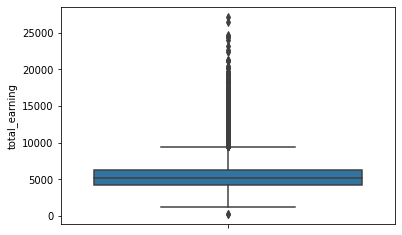

In [14]:
# New boxplot of filteres dataframe
boxplot_columns = ["to_user_distance", "to_user_elevation", "total_earning"]
for i, column in enumerate(boxplot_columns):
    plt.figure(1)
    sns.boxplot(data=orders_filt_df, y=orders_filt_df[column], hue="taken")
    plt.show()

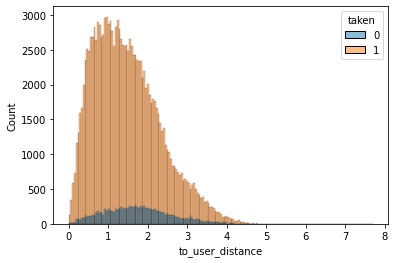

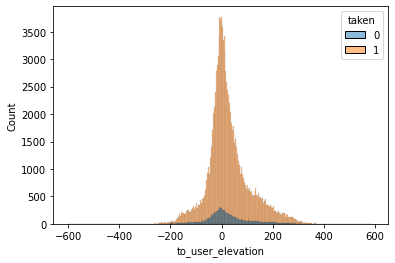

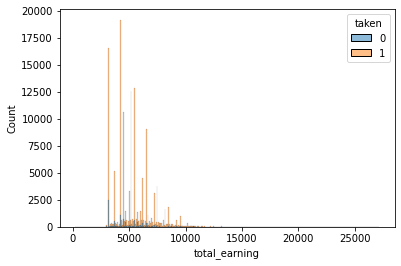

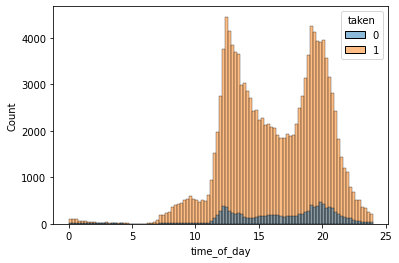

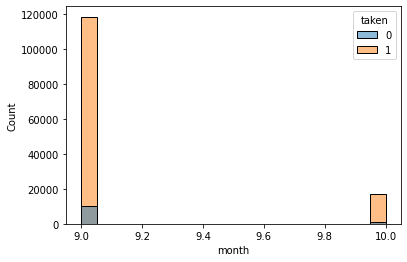

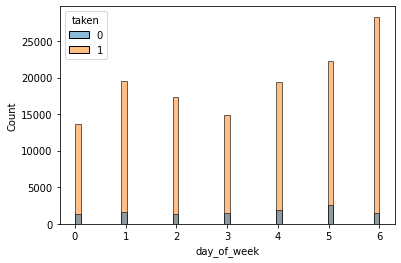

In [15]:
hist_columns = ["to_user_distance", "to_user_elevation", "total_earning", "time_of_day", "month", "day_of_week"]
for i, column in enumerate(hist_columns):
    plt.figure(1)
    sns.histplot(data=orders_filt_df, x=orders_filt_df[column], hue="taken")
    plt.show()

Total earning and day of week, are the only univariate variables that seem to have prediction power

Only month 9 and 10 are present, this wont be used in the prediction

In [16]:
orders_filt_df["month"].value_counts()

9     128705
10     18269
Name: month, dtype: int64

The only months present in the dataset are 9 and 10

In [1]:
sns.pairplot(data = orders_filt_df[["to_user_distance", "to_user_elevation", "time_of_day", "taken"]], hue="taken")

NameError: name 'sns' is not defined

What store ids are the most popular? 

Can we assign a flag, popular or not popular?

<AxesSubplot:>

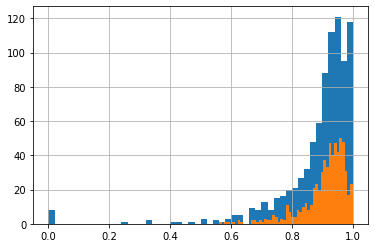

In [17]:
aux = orders_filt_df.copy()
aux["is_taken"] = aux["taken"] == 1
aux["not_taken"] = aux["taken"] == 0


aux = aux.groupby("store_id").agg("sum")[["taken", "is_taken", "not_taken"]]
aux["total_orders"] = (aux["is_taken"] + aux["not_taken"])
aux["rating"] = aux["is_taken"] / aux["total_orders"] 
aux = aux.sort_values("rating", ascending=False)

#aux.total_orders.hist(bins=50)
aux.total_orders.describe()
aux.rating.hist(bins=50)


aux[(aux.total_orders > 22) & (aux.rating > 0.5)].rating.hist(bins=50)


# Models

## Logistic regression

In [371]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [372]:
orders_filt_df.columns

Index(['order_id', 'store_id', 'to_user_distance', 'to_user_elevation',
       'total_earning', 'created_at', 'taken', 'day_of_week', 'month',
       'time_of_day'],
      dtype='object')

In [373]:
features = orders_filt_df[["to_user_distance", "to_user_elevation", "total_earning", "day_of_week", "time_of_day"]]
labels = orders_filt_df["taken"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size = 0.25, stratify=labels, random_state=314)

In [374]:
y_test.describe()

count    36744.000000
mean         0.921212
std          0.269412
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: taken, dtype: float64

In [375]:
model = linear_model.LogisticRegression(random_state=314, max_iter=100, class_weight="balanced")
model.fit(X_train, y_train)

predicted = model.predict(X_test)

In [376]:
metrics.roc_auc_score(y_train, model.predict(X_train))

0.5996161889481092

In [377]:
metrics.roc_auc_score(y_test, predicted)

0.5896745175962064

In [378]:
predicted.sum()/len(predicted)

0.5690180709775746

### Scaler

In [379]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_t = scaler.transform(X_train)

In [416]:
model = linear_model.LogisticRegression(random_state=314, max_iter=100, class_weight="balanced")
model.fit(X_train_t, y_train)

predicted = model.predict(scaler.transform(X_test))

In [417]:
metrics.roc_auc_score(y_test, predicted)

0.5959626393169175

In [418]:
predicted.sum()/len(predicted)

0.5847485303723057

<AxesSubplot:xlabel='x', ylabel='y'>

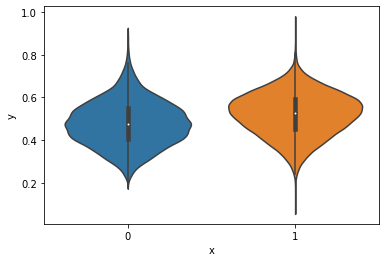

In [419]:
probs_train = model.predict_proba(X_train_t)


plot_df = pd.DataFrame({"x": y_train, "y": probs_train[:, 1]})
sns.violinplot(data=plot_df, y="y", x="x")

## Random Forest

In [430]:
from sklearn import ensemble

In [449]:
forest_model = ensemble.RandomForestClassifier(n_estimators=100, min_samples_split=1000, max_depth=20, class_weight="balanced", max_leaf_nodes=100)
forest_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_leaf_nodes=100, min_samples_split=1000)

In [450]:
predictions = forest_model.predict(X_train)

In [451]:
metrics.roc_auc_score(y_train, predictions)

0.6736542354985083

In [452]:
predictions_test = forest_model.predict(X_test)

In [453]:
metrics.roc_auc_score(y_test, predictions_test)

0.648450165065606

<AxesSubplot:xlabel='x', ylabel='y'>

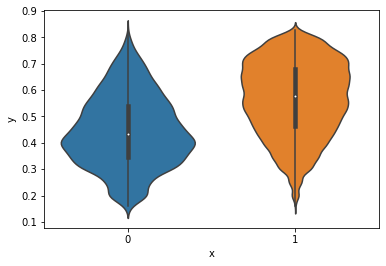

In [437]:
probs_train = forest_model.predict_proba(X_train)

plot_df = pd.DataFrame({"x": y_train, "y": probs_train[:, 1]})
sns.violinplot(data=plot_df, y="y", x="x")

In [445]:
predicted_th = probs_train[:, 1] > 0.5
metrics.roc_auc_score(y_train, predicted_th)

0.6723194577003488

## XGBoost

In [242]:
import xgboost as xgb

In [362]:
xgb_model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 100, alpha = 5, n_estimators = 500, scale_pos_weight=8/92)

In [363]:
xgb_model.fit(X_train, y_train)

XGBClassifier(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=5, reg_lambda=1, scale_pos_weight=0.08695652173913043,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [364]:
predictions_train = xgb_model.predict(X_train)
predictions_test

array([1, 1, 1, ..., 1, 1, 1])

In [365]:
metrics.roc_auc_score(y_train, predictions_train)

0.7578599866376515

In [366]:
metrics.roc_auc_score(y_test, predictions_test)

0.658085597159099

In [369]:
xgb_model.feature_importances_

array([0.148143  , 0.08142571, 0.38468948, 0.23201925, 0.15372258],
      dtype=float32)

In [370]:
X_train.columns

Index(['to_user_distance', 'to_user_elevation', 'total_earning', 'day_of_week',
       'time_of_day'],
      dtype='object')